# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [1]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [4]:
# scrape the data
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content,'html.parser')

In [17]:
treat_names = [x.attrs['title'] for x in soup.findAll('a',class_='name-link')]
treat_names

['Greenies Regular Dental Dog Treats',
 'Greenies Petite Dental Dog Treats',
 'Greenies Large Dental Dog Treats',
 'Pedigree Dentastix Large Dog Treats',
 'Greenies 6 Month+ Puppy Petite Dental Dog Treats',
 'Greenies 6 Month+ Puppy Dental Dog Treats',
 'Greenies 6 Month+ Puppy Teenie Dental Dog Treats',
 'Greenies Teenie Dental Dog Treats',
 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Pedigree Dentastix Large Dog Sticks',
 'Milk-Bone Brushing Chews Large Dental Dog Treats',
 'Pedigree Dentastix Small/Medium Dog Sticks',
 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack',
 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free',
 'Pedigree Dentastix Mini Dog Sticks',
 'Virbac® C.E.T.® VeggieDent® Tartar Control Dog Chews',
 'Milk-Bone Brushing Chews Dental Dog Treat',
 'Authority® Dental & DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Pedigree Dentastix Large Dog Sticks',
 'Pedigree Dentastix T

In [19]:
# load the data into a dataframe file
df = pd.DataFrame(treat_names,columns=['name'])
df.head()

,name
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


In [21]:
# save the data as a csv file
df.to_csv('data/part1.csv',index=False)

In [22]:
# display df.head()
df_new = pd.read_csv('data/part1.csv')
df_new.head()

,name
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [26]:
import numpy as np
import scipy.stats as stats
df2 = pd.read_csv('data/part2.csv')
df2.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [39]:
# create a function that calculates the zscores of an array
def calc_zscores(an_array):
    return stats.zscore(np.array(an_array))

In [40]:
# calculate the zscore for each column and store them as a new column with the names used above
for i in [0,1,2]:
    new_col = df2.columns[i]+'_zscore'
    df2[new_col] = calc_zscores(df2[df2.columns[i]])
df2.head()

,salaries,NPS Score,eventOutcome,salaries_zscore,NPS Score_zscore,eventOutcome_zscore
0,44112.0,-7.0,1,-1.460301,-0.913613,-1.103276
1,46777.0,-12.0,2,-0.794061,-1.080776,-0.668162
2,50013.0,50.0,5,0.014927,0.992046,0.637182
3,48983.0,-13.0,0,-0.242569,-1.114209,-1.538391
4,50751.0,-11.0,6,0.199425,-1.047343,1.072296


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'NPS Scores')

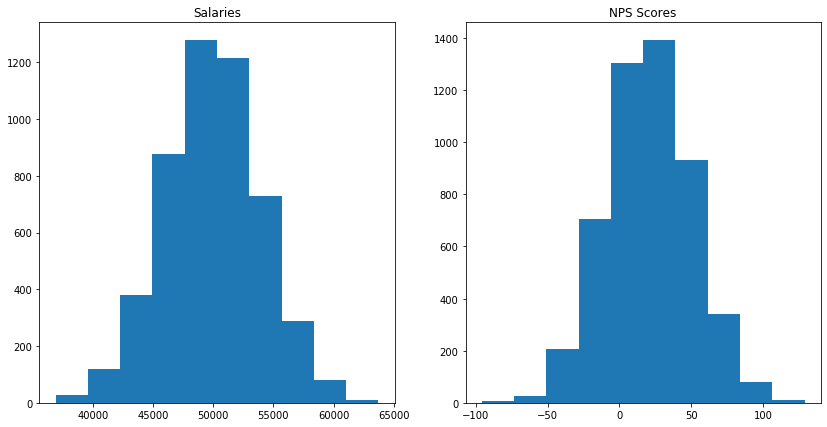

In [49]:
# plot for raw salaries and NPS Score data goes here
fig = plt.figure(figsize=(14,7))
axs=fig.subplots(1,2)
axs[0].hist(df2['salaries'])
axs[0].set_title('Salaries')
axs[1].hist(df2['NPS Score'])
axs[1].set_title('NPS Scores')

Text(0.5, 1.0, 'NPS Scores Z scores')

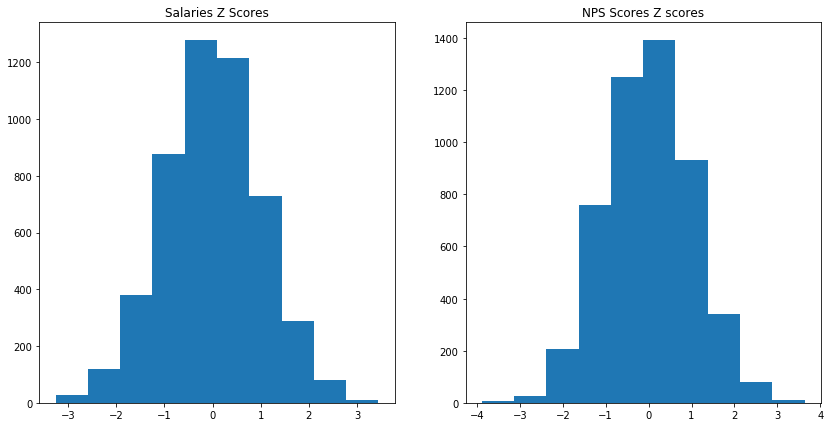

In [51]:
# plot for zscores for salaries and NPS Score data goes here
fig = plt.figure(figsize=(14,7))
axs=fig.subplots(1,2)
axs[0].hist(df2['salaries_zscore'])
axs[0].set_title('Salaries Z Scores')
axs[1].hist(df2['NPS Score_zscore'])
axs[1].set_title('NPS Scores Z scores')

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [61]:
pmf = df2['eventOutcome'].value_counts()/len(df2)

Int64Index([4, 7, 3, 0, 6, 1, 2, 5], dtype='int64')

<BarContainer object of 8 artists>

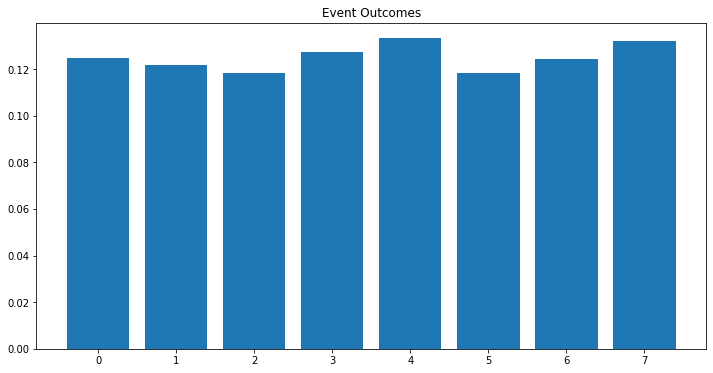

In [69]:
plt.figure(figsize=(12,6))
plt.title('Event Outcomes')
plt.bar(pmf.index,pmf)

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [79]:
pmf_sort = pmf.sort_index(axis=0)

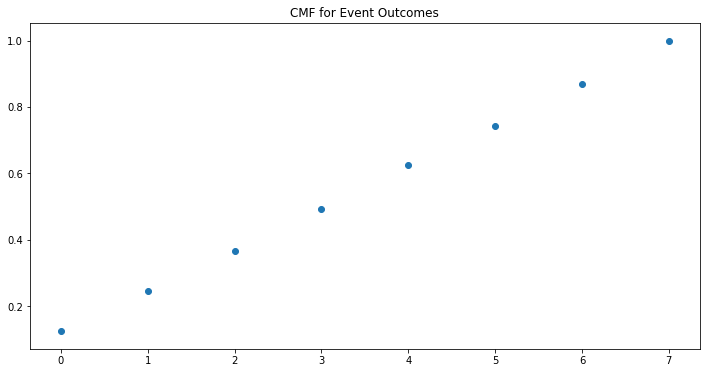

In [80]:
plt.figure(figsize = (12,6))
plt.title('CMF for Event Outcomes')
plt.scatter(pmf_sort.index,np.cumsum(pmf_sort),)

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [89]:
# find salaries with zscores <= 2.0 
df2.query('salaries_zscore<=-2')

,salaries,NPS Score,eventOutcome,salaries_zscore,NPS Score_zscore,eventOutcome_zscore
20,39383.0,47.0,1,-2.642533,0.891748,-1.103276
41,38063.0,2.0,5,-2.972528,-0.612719,0.637182
89,41458.0,65.0,7,-2.123791,1.493535,1.507411
107,40854.0,27.0,4,-2.274789,0.223096,0.202067
285,40886.0,43.0,5,-2.266789,0.758018,0.637182
...,...,...,...,...,...,...
4692,38341.0,37.0,3,-2.903029,0.557422,-0.233047
4707,41813.0,96.0,1,-2.035042,2.529946,-1.103276
4731,41184.0,21.0,0,-2.192290,0.022500,-1.538391
4765,40108.0,43.0,2,-2.461286,0.758018,-0.668162


In [92]:
# calculate skewness and kurtosis of NPS Score column
print('Skewness:',round(stats.skew(df2['NPS Score']),4))
print('Kurtosis:',round(stats.kurtosis(df2['NPS Score']),4))

Skewness: 0.0245
Kurtosis: -0.0421


# run the cell below to convert your notebook to a README for assessment

In [94]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files\
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 487524 bytes to assessment.md
